In [1414]:
import numpy as np
import pylab as plt
import scipy.stats

In [2]:
N = 1000
z0 = np.random.randn(N)
zlo = z0 - np.random.rand(N)*0.1
zhi = z0 + np.random.rand(N)*0.1
zhi *= 0
zhi += 1
zlo *= 0
zlo[:] = -5
zhi[500:] = 5

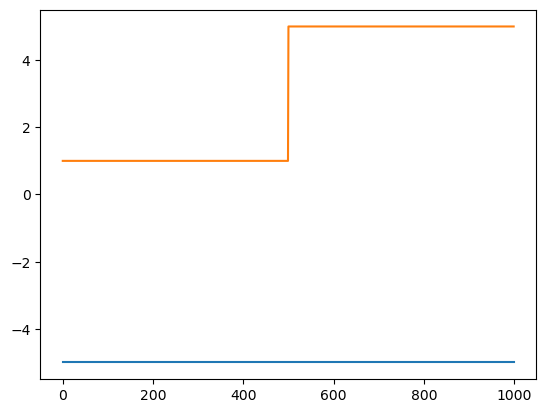

In [3]:
plt.plot(zlo)
plt.plot(zhi)

947.3581199982259
1042.2652254745724


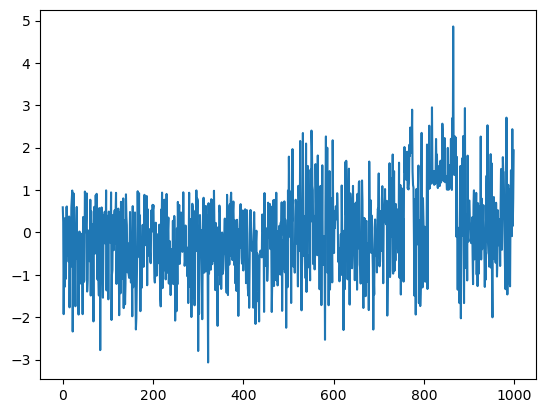

In [7]:
w = zhi-zlo
idx = np.argsort(w)
z = np.random.randn(N)
r = np.zeros_like(z)
print((z0**2).sum())
for i in idx:
    m = (zlo[i] <= z) & (z <= zhi[i])
    if sum(m) == 0:
        r[i] = zlo[i] + w[i]*np.random.rand()
    else:
        ip = list(m).index(1)
        r[i] = z[ip]
        z[ip] = -np.inf
plt.plot(r)
print((r**2).sum())

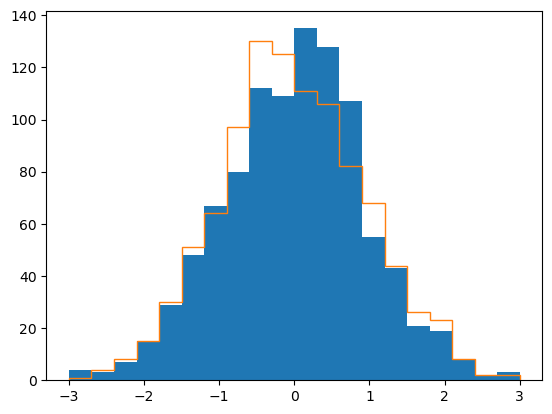

In [5]:
plt.hist(r, bins = 20, range = [-3, 3]);
plt.hist(z0, bins = 20, range = [-3, 3], histtype = 'step');

In [1415]:
N = 1000
z0 = np.random.randn(N)

In [1416]:
epsilon = 0.3
uhi = z0 + epsilon
ulo = z0 - epsilon
bounds = np.array([ulo, uhi]).T

In [1417]:
def resample_uniform(bounds):
    """This function samples from the bounded region, with typical-set stabilization."""
    ulo, uhi = bounds.T
    ulo = np.clip(ulo, 0., 1.)
    uhi = np.clip(uhi, 0., 1.)
    width = uhi-ulo
    N = len(bounds)
    u_sample = np.random.rand(N)
    match = (u_sample.reshape(-1, 1) >= ulo) & (u_sample.reshape(-1, 1) <= uhi)  # boolean match (u_samples, bounds)
    u_out = np.zeros(N)
    i_ordered = np.arange(N)
    avail = np.ones(N) == 1
    counter = 0
    idx = np.argsort(width + np.random.randn(len(width))*0.)  # indices ordered from small to large
    #num_matches = np.sum(match, axis=0)
    #idx = np.argsort(num_matches)
    for i in idx:  # loop over bound indices
        i_matches = i_ordered[match[:,i]*avail]
        if len(i_matches) == 0:
            u_out[i] = np.random.uniform(ulo[i], uhi[i])
            counter += 1
            #print(ulo[i], uhi[i], sum(avail))
        else:
            i_choice = np.random.choice(i_matches)
            avail[i_choice] = False
            u_out[i] = u_sample[i_choice]
    print(counter)
    return u_out

In [1418]:
def resample_uniform2(bounds):
    """This function samples from the bounded region, with typical-set stabilization."""
    ulo, uhi = bounds.T
    ulo = np.clip(ulo, 0., 1.)
    uhi = np.clip(uhi, 0., 1.)
    width = uhi-ulo
    N = len(bounds)
    u_sample = np.random.rand(N)
    u_sample = d.cdf(z0)
    match = (u_sample.reshape(-1, 1) >= ulo) & (u_sample.reshape(-1, 1) <= uhi)  # boolean match (u_samples, bounds)
    u_out = np.zeros(N)
    i_ordered = np.arange(N)
    avail = np.ones(N) == 1
    counter = 0
    num_matches = np.sum(match, axis=1)  # number of matching bounds for given sample
    num_matches2 = np.sum(match, axis=0)  # number of samples that match a bound
    idx = np.argsort(num_matches)
    for i in idx:  # loop over proposal indices, ordered by how many bounds they match
        i_matches = i_ordered[match[i]*avail]  # indices of available matching bounds
        if len(i_matches) == 0:
            pass # cannot be used
            #u_out[i] = np.random.uniform(ulo[i], uhi[i])
            counter += 1
            #print(ulo[i], uhi[i], sum(avail))
        else:
            i_choice = np.random.choice(i_matches)  # pick randomly a bound
#            i_choice = i_matches[np.argsort(num_matches2[i_matches])]
            avail[i_choice] = False  # that bound has been filled already
            u_out[i_choice] = u_sample[i]  # with this ample
    for i in i_ordered[avail]:  # loop over all bounds that haven't been matched
        u_out[i] = np.random.uniform(ulo[i], uhi[i])
        #print(ulo[i], uhi[i]) 
    print(counter, sum(avail))
    return u_out

In [1419]:
def resample_uniform3(bounds):
    """This function samples from the bounded region, with typical-set stabilization."""
    N = len(bounds)
    ulo, uhi = bounds.T
    ulo = np.clip(ulo, 0., 1.)
    uhi = np.clip(uhi, 0., 1.)
    width = uhi-ulo
    u_BS = ulo + np.random.rand(N)*width  # bounded samples
    idx_BS = np.argsort(np.argsort(u_BS))
    u_free = np.random.rand(N)  # unb}ounded samples
    u_free_sorted = np.sort(u_free)  # sorted unbounded samples
    u = u_free_sorted[idx_BS]
    return u

In [1420]:
def resample(dist, bounds):
    u_bounds = dist.cdf(bounds)
    u = resample_uniform3(u_bounds)
    return dist.ppf(u)

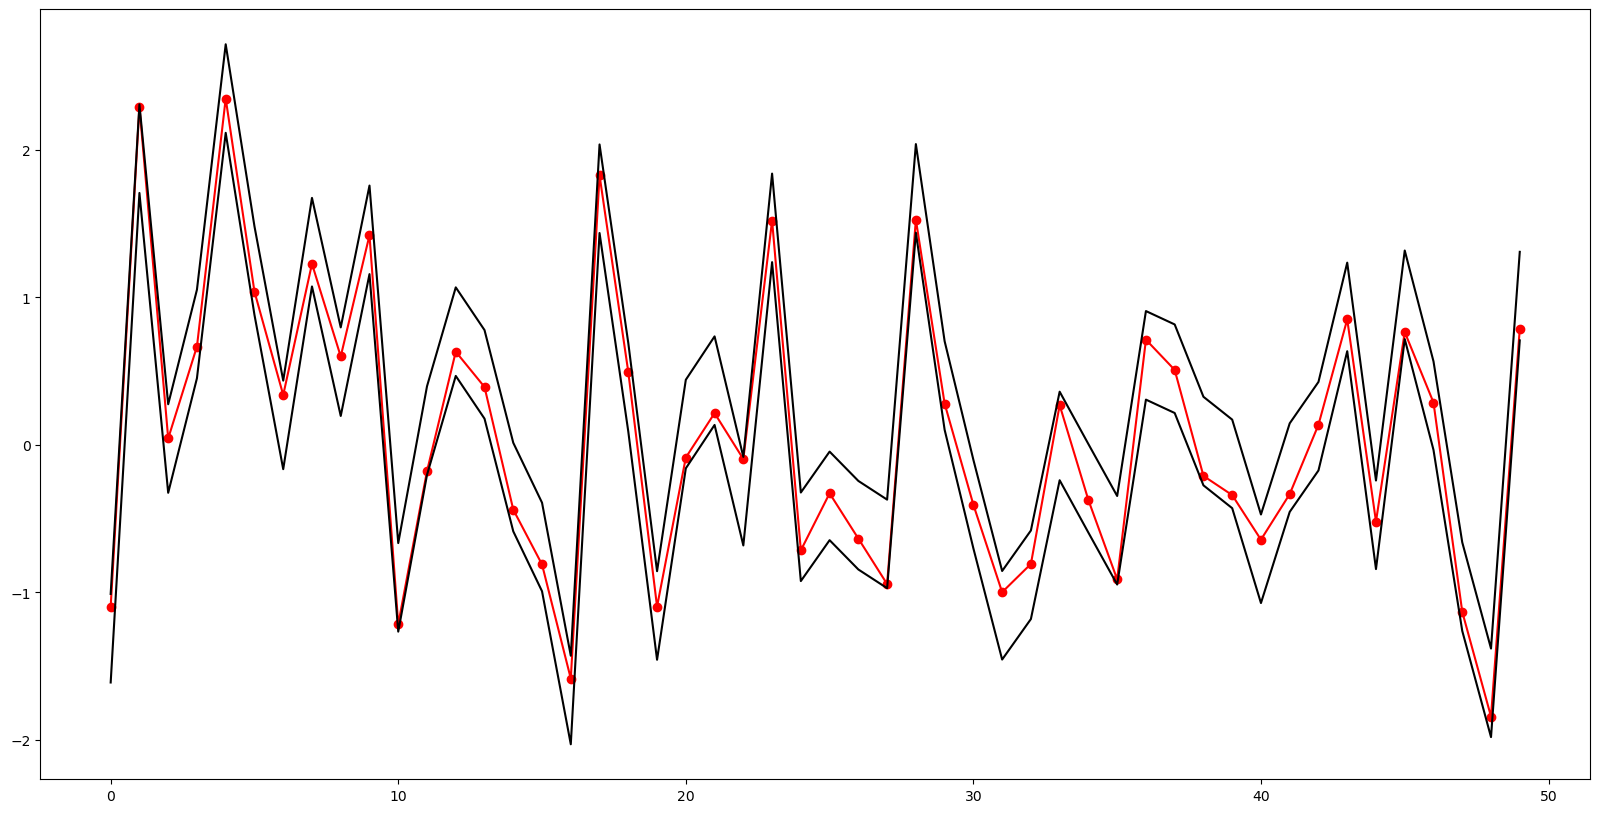

In [1421]:
dist = scipy.stats.norm(0, 1)
plt.figure(figsize = (20, 10))
z = resample(dist, bounds)
n = 50
plt.plot(z[:n], marker='o', color='r')
plt.plot(uhi[:n], 'k')
plt.plot(ulo[:n], 'k')

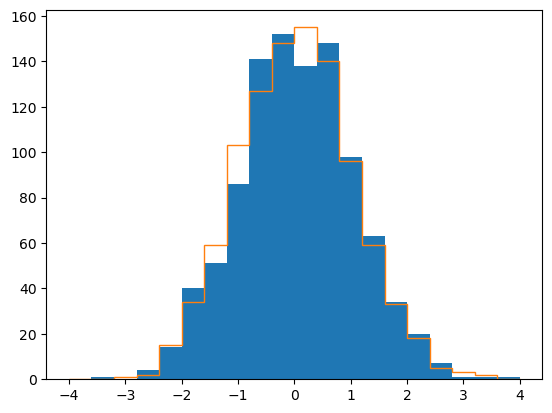

In [1422]:
plt.hist(z0, bins = 20, range = [-4, 4]);
plt.hist(z, bins = 20, range = [-4, 4], histtype = 'step');

In [1425]:
z = resample(d, bounds)
print(np.var(z0), np.var(z))

1.0310639954240493 1.0909093626116237


0.011035953572833206


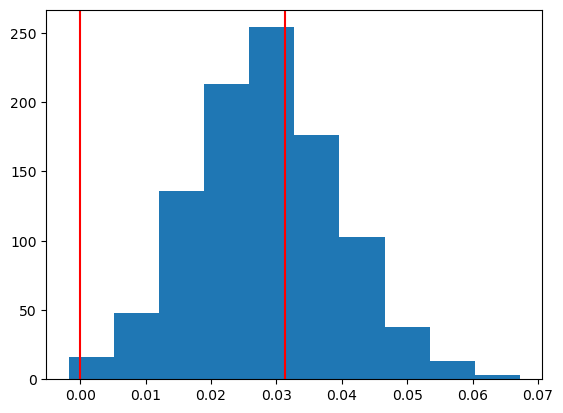

In [1426]:
z = [resample(dist, bounds) for _ in range(1000)]
zmean = [x[:500].mean()-x[500:].mean() for x in z]
plt.hist(zmean);
v0 = z0[:500].mean() - z0[500:].mean()
plt.axvline(0, color='r')
plt.axvline(v0, color='r')
print(np.var(zmean)**0.5)

In [1427]:
1/1000**0.5

0.03162277660168379

In [1428]:
# De-correlate